## Analysis of the Energy through the System

Given that we want to develop our analysis in the most stable structure one can get, then its important to get rid of all the noise that the system inherently might have, for instance, given the pressure and temperature of it. So, for this, our approach is simple yet effective:
 - Find the stationary time $t_s$
 - Compute an average of the structure through this stationary time ($t_s, t_f$)

This would then yield in a hopefully stable structure which "removes" or smoothes the internal fluctuations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Line to unpack .xvg generated by GROMACS
t_e, ene = np.loadtxt("/Users/alejandro/Desktop/mddocs/processing-analysis/fullcol-0308/results-0808/energy.xvg",comments=["@","#"],unpack=True)

In [22]:
# "Accumulated" Mean
n_data = len(ene)
ene_acummean = np.zeros(n_data)

for i in range(n_data):
    ene_acummean[i] = np.mean(ene[0:i+1])

# Compute mean through timescales
ts = 2500 #ps
n_m = int(t_e[-1]/ts)
stp_nm = int((len(t_e)-1)/n_m)
ene_mean = np.zeros(n_m)
t_rep = np.zeros(n_m)

for i in range(n_m):
    ene_mean[i] = np.mean(ene[stp_nm*i:stp_nm*(i+1)])
    t_rep[i] = np.mean(t_e[stp_nm*i:stp_nm*(i+1)])

# Difference and Comparison
dif = abs(ene - ene_acummean)
dif_mean = np.zeros(n_data)
for i in range(n_data):
    dif_mean[i] = np.mean(dif[0:i+1])

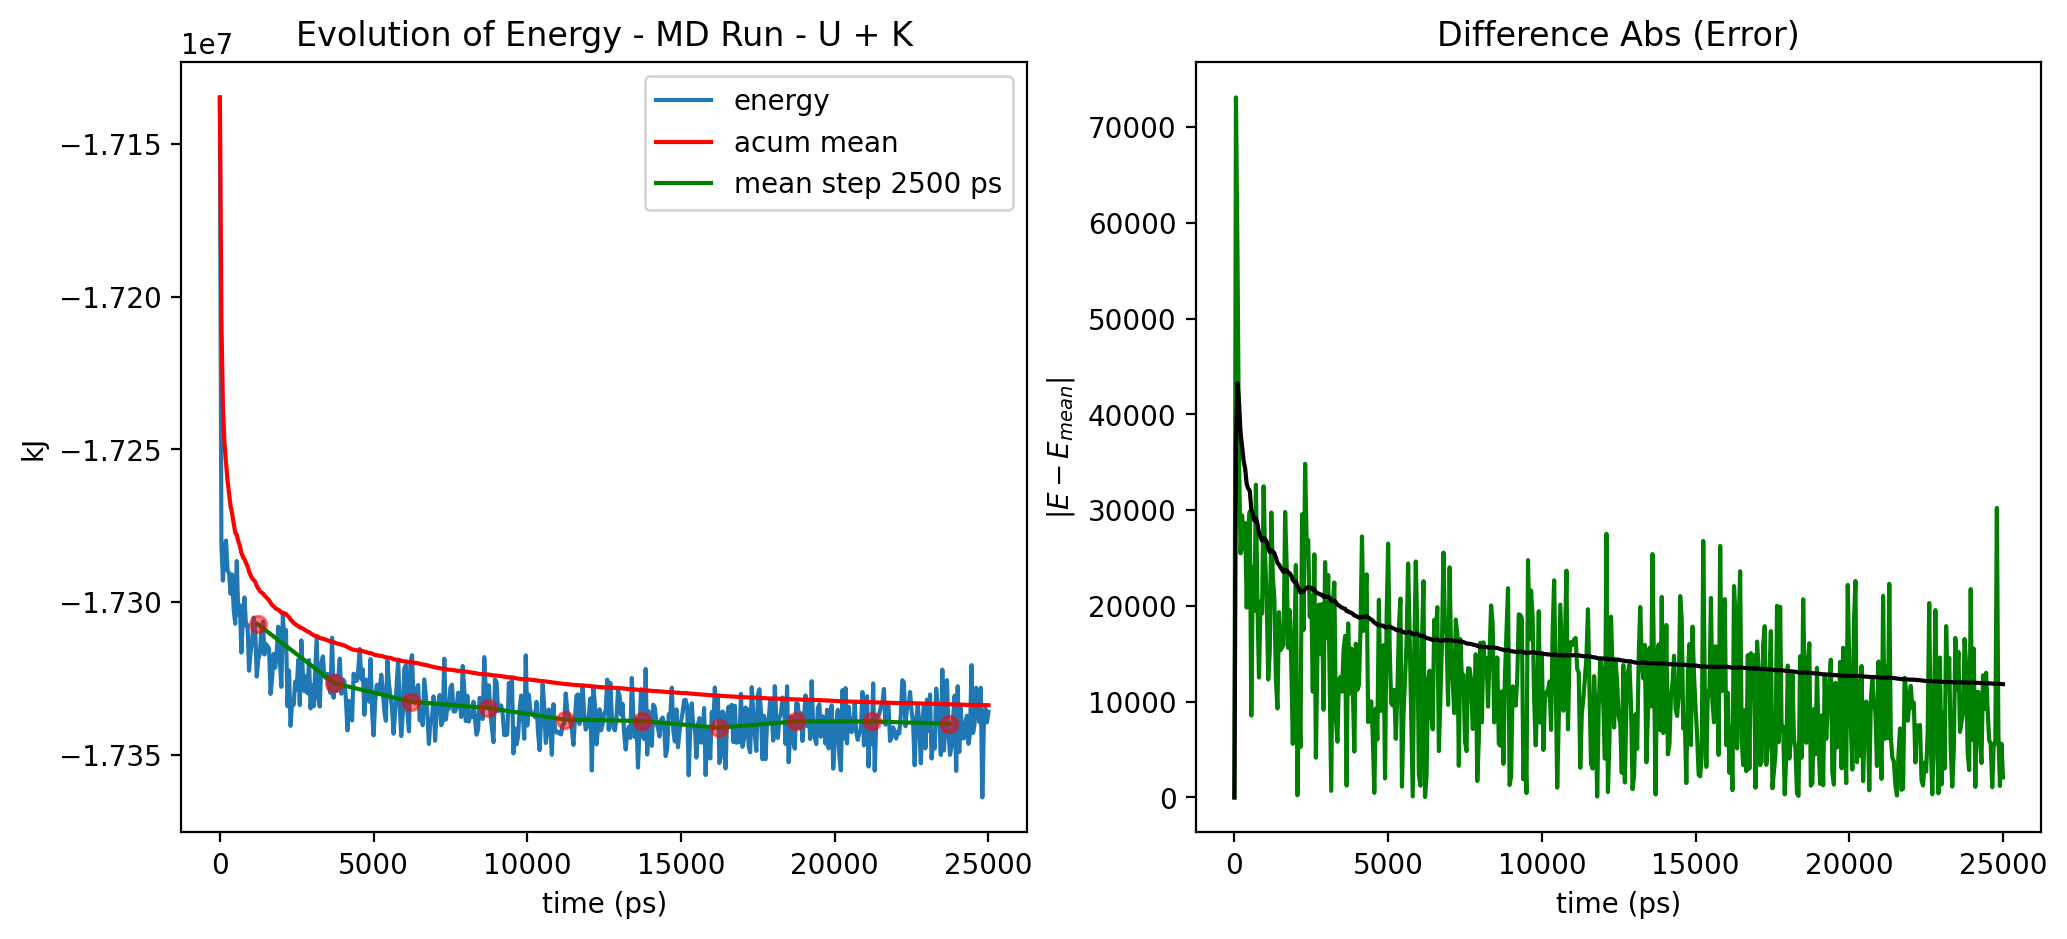

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=200)

# -- Energy and Mean --
axs[0].plot(t_e, ene, label="energy")

# Acum Mean
axs[0].plot(t_e, ene_acummean, label="acum mean", color="r")

# "Bin" Mean
axs[0].plot(t_rep, ene_mean, label=f"mean step {ts} ps", color='g')
axs[0].scatter(t_rep, ene_mean, color='r', alpha=0.5, zorder=3)

axs[0].set_xlabel("time (ps)")
axs[0].set_ylabel("kJ")
axs[0].set_title("Evolution of Energy - MD Run - U + K")
axs[0].legend()

# -- Difference Evolution --
axs[1].plot(t_e, dif, color='g', label = 'errors')
axs[1].plot(t_e, dif_mean, color='k', label = 'acum mean')
axs[1].set_xlabel('time (ps)')
axs[1].set_ylabel(r'$|E - E_{mean}|$')
axs[1].set_title('Difference Abs (Error)')

plt.show()